# Задача

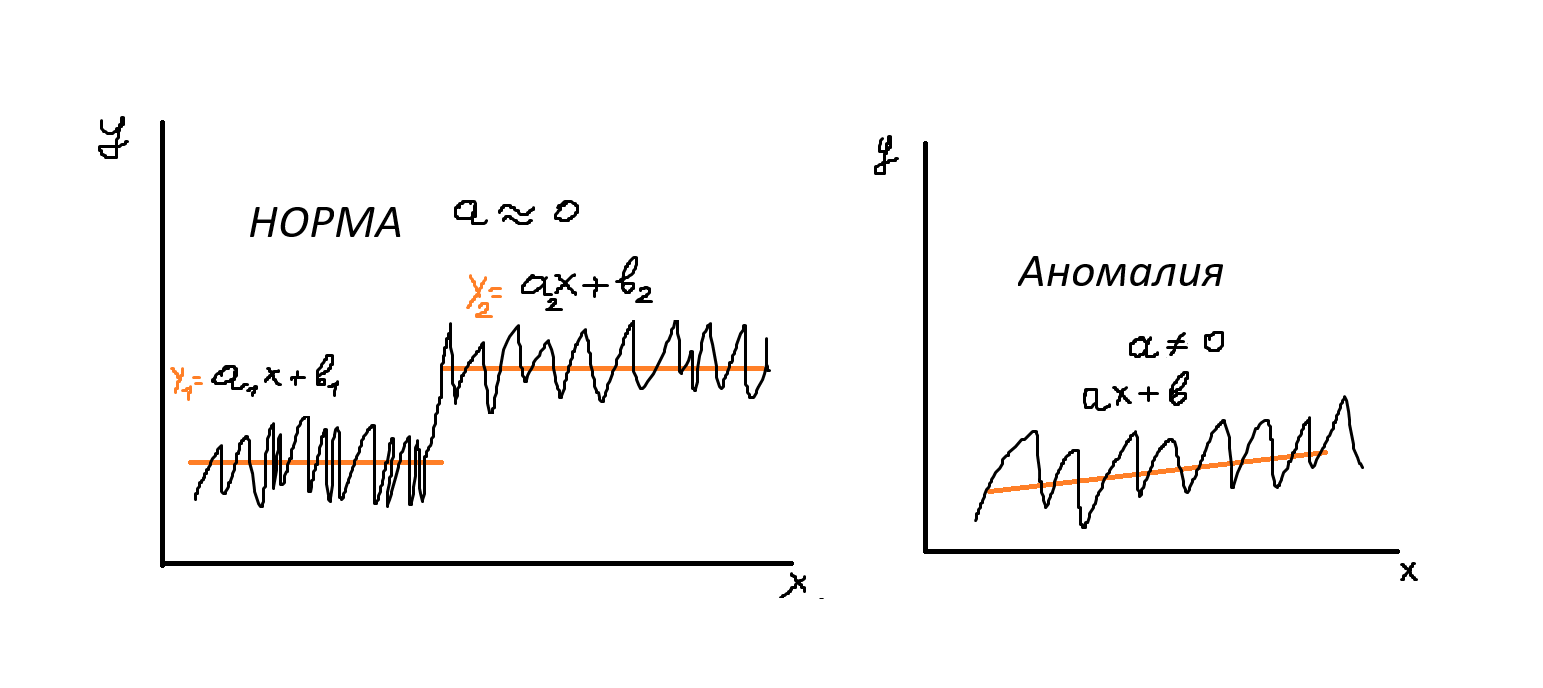

#Start
245k ~ 1 month  

5k ~ 1.5 hours

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Uvelka/AnomalyDetection')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
DATAPAH = '/content/drive/MyDrive/Colab Notebooks/Uvelka/Data/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
df = pd.read_csv(DATAPAH + 'concat_data.csv', date_format = "%d/%m/%Y", parse_dates=['Дата/Время'], decimal = ',', dayfirst=True).iloc[:-1 , :]

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy_12_hours = df_copy.iloc[-42600:,:].reset_index().copy()

In [ ]:
df_copy_12_hours

,index,Unnamed: 0,Дата/Время,Токовый ремни Афл3.1.Максим RMS,Токовый губки Афл3.1.Максим RMS,Токовый нипроллер Афл3.1.Максим RMS,Токовый губки Афл3.2.Максим RMS,Токовый нипроллер Афл3.2.Максим RMS,Токовый ремни Афл3.2.Максим RMS,Токовый ремни Афл3.3.Максим RMS,Токовый нипроллер Афл3.3.Максим RMS,Токовый губки Афл3.3.Максим RMS,Токовый губки Афл3.4.Максим RMS,Токовый нипроллер Афл3.4.Максим RMS,Токовый ремни Афл3.4.Максим RMS,Токовый губки Афл3.5.Максим RMS,Токовый нипроллер Афл3.5.Максим RMS,Токовый ремни Афл3.5.Максим RMS
0,15149898,15149898,19.03.2024 1:13:21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15149899,15149899,19.03.2024 1:13:22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15149900,15149900,19.03.2024 1:13:23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15149901,15149901,19.03.2024 1:13:24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15149902,15149902,19.03.2024 1:13:25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42595,15192493,15192493,19.03.2024 13:13:20,0.0,0.0,NaN,25.2,NaN,NaN,255.5,2.5,NaN,NaN,2.7,14.9,19.7,3.8,0.3
42596,15192494,15192494,19.03.2024 13:13:21,0.0,0.0,NaN,25.2,NaN,NaN,255.5,2.5,NaN,NaN,2.7,14.9,19.7,3.8,0.3
42597,15192495,15192495,19.03.2024 13:13:22,0.0,0.0,NaN,25.2,NaN,NaN,255.5,2.5,NaN,NaN,2.7,14.9,19.7,3.8,0.3
42598,15192496,15192496,19.03.2024 13:13:23,0.0,0.0,NaN,NaN,0.1,14.6,0.0,2.5,16.4,NaN,2.7,14.9,5.2,4.1,8.6


In [ ]:
test_data = df_copy_12_hours[['Дата/Время', 'Токовый ремни Афл3.1.Максим RMS']].reset_index().copy()#.iloc[19500:20500,:]

In [ ]:
test_data['Токовый ремни Афл3.1.Максим RMS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 42600 entries, 0 to 42599
Series name: Токовый ремни Афл3.1.Максим RMS
Non-Null Count  Dtype  
--------------  -----  
40954 non-null  float64
dtypes: float64(1)
memory usage: 332.9 KB


<Axes: >

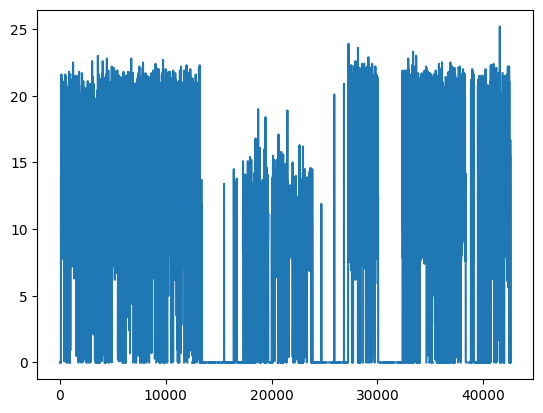

In [ ]:
test_data['Токовый ремни Афл3.1.Максим RMS'].plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Подготовка данных
train_data = test_data['Токовый ремни Афл3.1.Максим RMS'].dropna()
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Предсказание пропусков
forecast = model_fit.predict(start=0, end=42600, typ='levels')
test_data['Токовый ремни Афл3.1.Максим RMS'].fillna(pd.Series(forecast), inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

In [ ]:
window_size = 20*60
smoothed_ts = test_data['Токовый ремни Афл3.1.Максим RMS'].rolling(window=window_size, min_periods=1).median()

<Axes: >

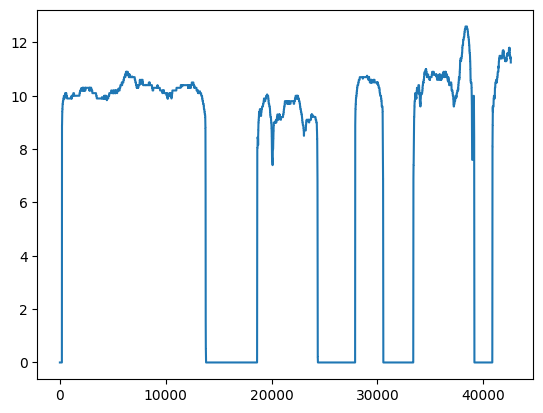

In [ ]:
smoothed_ts.plot()

# Идея №1
- Использовать функцию стоимости L2 (This cost function detects mean-shifts in a signal.) ruptures для детекции только mean shift.
- Извлекать тренд из ВР с некоторым параметром окна.

-> Если тренд != 0 и при этом в этом окне нет mean shift -> вероятнее всего это наша аномалия

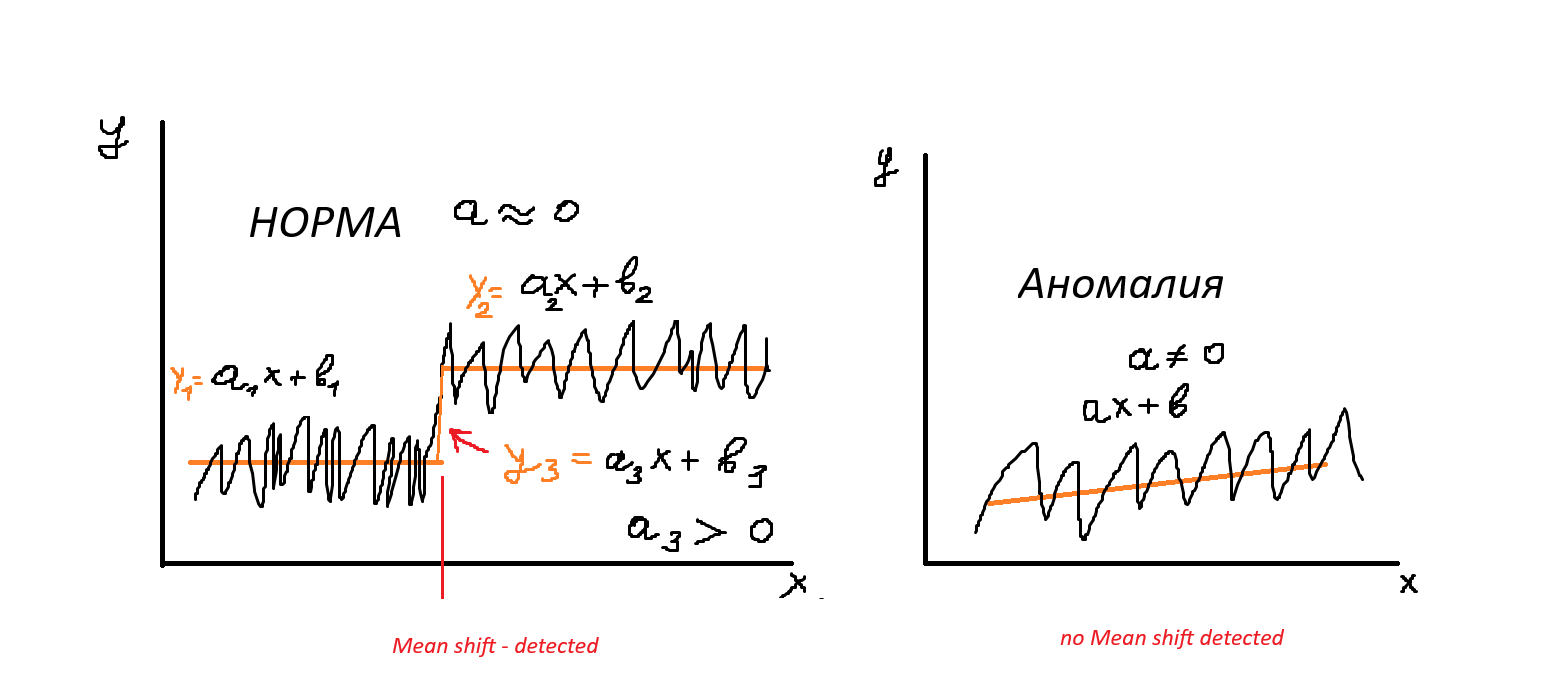

Понятно, что даже у хорошего сигнала без аномалий тренд не будет равен нулю, нужно подобрать порог, после которого считаем, что сигнал аномален.

In [ ]:
!pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.7 MB/s eta 0:00:00


## Детектим mean shift через ruptures

In [ ]:
import ruptures as rpt

In [ ]:
min_size = 30*60
padded_ts = pd.concat([pd.Series(np.zeros(min_size)), smoothed_ts]).reset_index(drop=True)

In [ ]:
padded_ts # Нужно для окна min_size для rpt.Pelt, иначе не детектит первые mean shift

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
44395,11.40
44396,11.35
44397,11.30
44398,11.30


In [ ]:
# Use the "normal" model to detect changes in variance
model = "l2"  # This model focuses on variance changes

In [ ]:
#%%timeit
%%time
algo = rpt.Pelt(model=model, min_size = min_size).fit(padded_ts.to_numpy())
change_points = algo.predict(pen=5)  # Adjust the penalty value as needed

CPU times: user 7.26 s, sys: 39.3 ms, total: 7.3 s
Wall time: 7.31 s


In [ ]:
len(change_points)

20

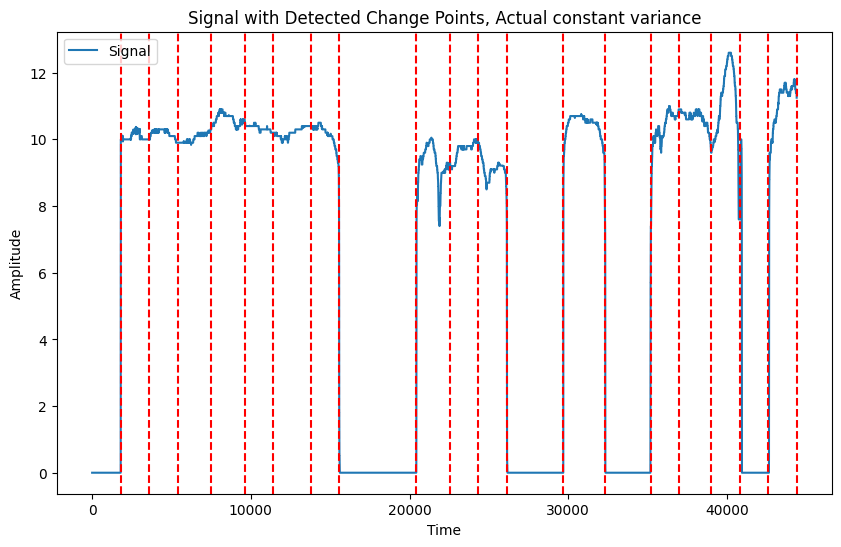

In [ ]:
# Plot the signal and detected change points
plt.figure(figsize=(10, 6))
plt.plot(padded_ts.to_numpy(), label='Signal')
plt.title('Signal with Detected Change Points, Actual constant variance')
plt.xlabel('Time')
plt.ylabel('Amplitude')
for cp in change_points:
    plt.axvline(x=cp, color='red', linestyle='--')
plt.legend()
plt.show()


pen = 5, 30 seconds, 39 anoms

pen = 35. 50 seconds, 30 anoms

По отрывку от 0 до ~ 13000 секунд видно что аномалий нет, но и детекций mean shift'ов много, отсюда следует:
- Либо настроить ruptures так, чтобы он был менее чуствителен (увеличить параметр pen - штрафование за каждый новый mean shift и увеличивать min_size - минимальное расстояние между детекциями, сильно ускоряет работу модели, но удаляет первую точку, желательно брать в начале отступ нулей размером величины окна min_size)
- Либо Добавить дополнительную проверку для mean shift - если он меньше 1-2 сигм разброса данных, попавших в окно, то не считаем его как mean shift

In [ ]:
mask = np.array(change_points) < 10000

In [ ]:
nump_ts = smoothed_ts.to_numpy()

In [ ]:
filtered_cps = np.array(change_points)[mask]

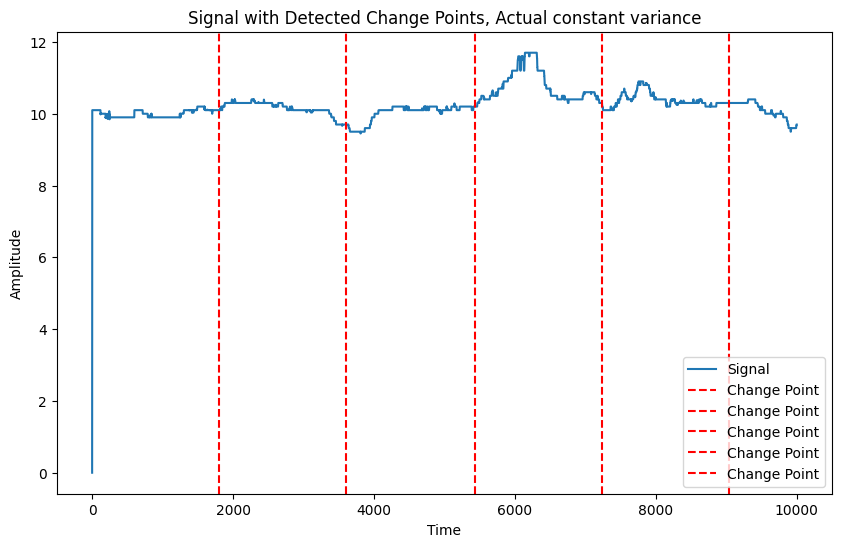

In [ ]:
# Plot the signal and detected change points
plt.figure(figsize=(10, 6))
plt.plot(nump_ts[:10000], label='Signal')
plt.title('Signal with Detected Change Points, Actual constant variance')
plt.xlabel('Time')
plt.ylabel('Amplitude')
for cp in filtered_cps:
    plt.axvline(x=cp, color='red', linestyle='--', label='Change Point')
plt.legend()
plt.show()


# Идея №2
Использовать алгоритм кластеризации, чтобы отделить разные конфигурации друг от друга и там где система простаивает.  
Посчитать для каждого кластера (конфигурации) свой тренд (если есть) и выяснить по его наклону ( **a >> 0** ) насколько он критичен (насколько оборудование деградировало)

## Через scikit learn mean shift (values only clustering)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

In [ ]:
# Apply Mean Shift
%%time
mean_shift = MeanShift(bandwidth=1.0)
mean_shift.fit(smoothed_ts.values.reshape(-1, 1))

CPU times: user 2min 50s, sys: 902 ms, total: 2min 51s
Wall time: 2min 54s


MeanShift(bandwidth=1.0)

In [ ]:
labels = mean_shift.labels_
cluster_Center = mean_shift.cluster_centers_[mean_shift.labels_]

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3]), array([29596, 12956,    31,    17]))

In [ ]:
range(len(cluster_Center))

range(0, 42600)

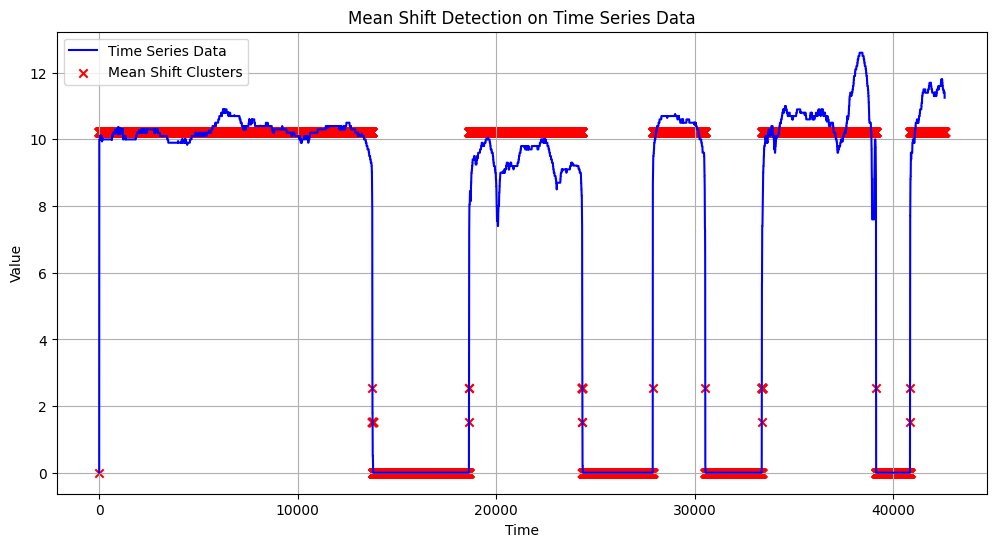

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(smoothed_ts, label='Time Series Data', color='blue')
plt.scatter(range(len(cluster_Center)), cluster_Center, color='red', label='Mean Shift Clusters', marker='x')
plt.title('Mean Shift Detection on Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# scikit learn mean shift detection ((value + time) clustering)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

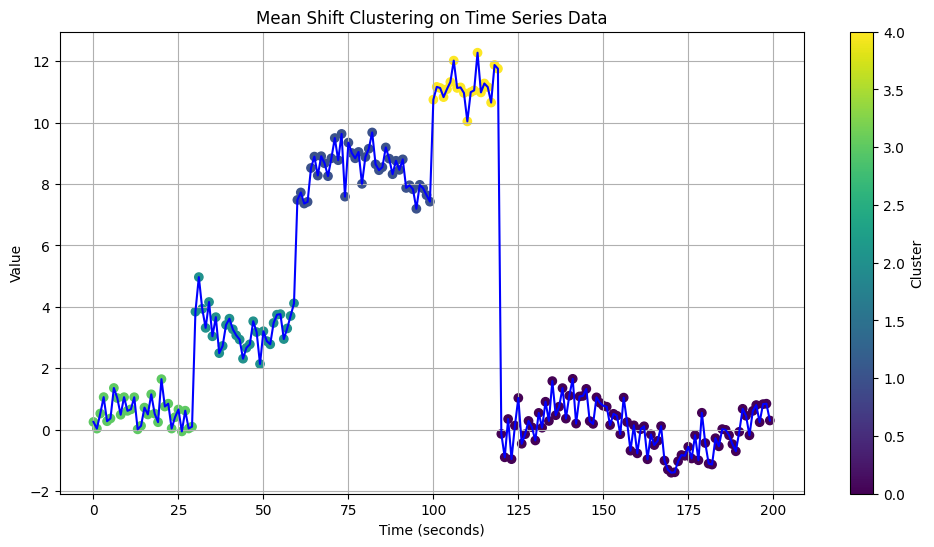

In [ ]:
# Step 1: Generate synthetic time series data
np.random.seed(42)
time = np.arange(0, 200)
data = np.sin(time / 10) + np.random.normal(scale=0.5, size=time.shape)

# Introduce shifts
data[30:60] += 4.0  # Shift the mean of the signal
data[60:100] += 8.0  # Shift the mean of the signal again
data[100:120] += 12.0  # Shift the mean of the signal again

# Create a DataFrame
df = pd.DataFrame({'time_in_seconds': time, 'value': data})

# Prepare the data for clustering
X = df[['time_in_seconds', 'value']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Mean Shift
mean_shift = MeanShift(bandwidth=0.5)  # Adjust the bandwidth parameter as needed
mean_shift.fit(X_scaled)

# Get the cluster labels
df['cluster'] = mean_shift.labels_

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df['time_in_seconds'], df['value'], label='Time Series Data', color='blue')
plt.scatter(df['time_in_seconds'], df['value'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('Mean Shift Clustering on Time Series Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Value')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


На настоящих данных

In [ ]:
smoothed_ts

,Токовый ремни Афл3.1.Максим RMS
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
42595,11.40
42596,11.35
42597,11.30
42598,11.30


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create a DataFrame
df_MSD = pd.DataFrame({'time_in_seconds': smoothed_ts.reset_index()['index'], 'value': smoothed_ts})

# Prepare the data for clustering
X = df_MSD[['time_in_seconds', 'value']].values


In [ ]:
%%time
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

CPU times: user 4.47 ms, sys: 0 ns, total: 4.47 ms
Wall time: 4.17 ms


In [ ]:
%%time
# Apply Mean Shift
mean_shift = MeanShift(bandwidth=1.5)  # Adjust the bandwidth parameter as needed
mean_shift.fit(X_scaled)

CPU times: user 8min 7s, sys: 1.65 s, total: 8min 9s
Wall time: 8min 16s


MeanShift(bandwidth=1.5)

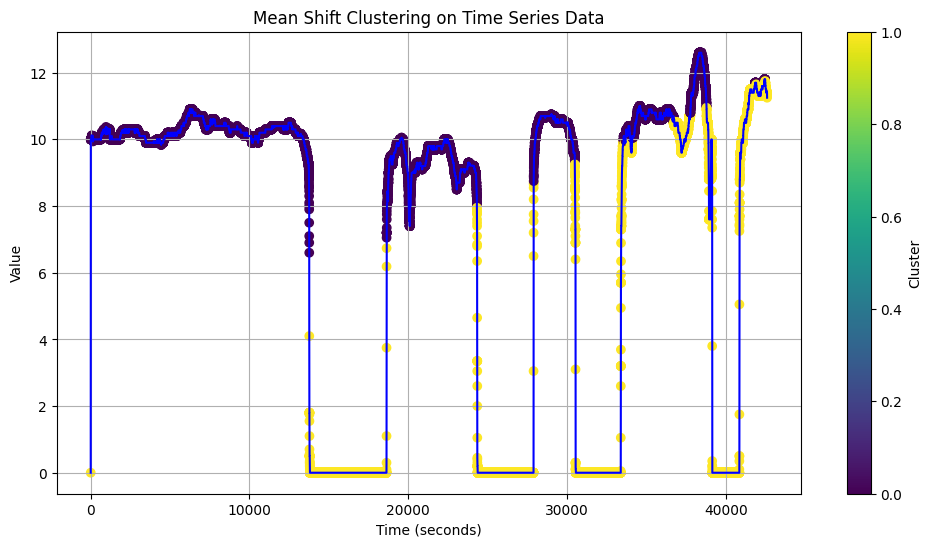

In [ ]:
# Get the cluster labels
df_MSD['cluster'] = mean_shift.labels_

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_MSD['time_in_seconds'], df_MSD['value'], label='Time Series Data', color='blue')
plt.scatter(df_MSD['time_in_seconds'], df_MSD['value'], c=df_MSD['cluster'], cmap='viridis', marker='o')
plt.title('Mean Shift Clustering on Time Series Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Value')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [ ]:
%%time
# Apply Mean Shift
mean_shift = MeanShift(bandwidth=1.0, n_jobs=-1)  # Adjust the bandwidth parameter as needed
mean_shift.fit(X_scaled)

CPU times: user 23.3 s, sys: 4.65 s, total: 27.9 s
Wall time: 9min 13s


MeanShift(bandwidth=1.0, n_jobs=-1)

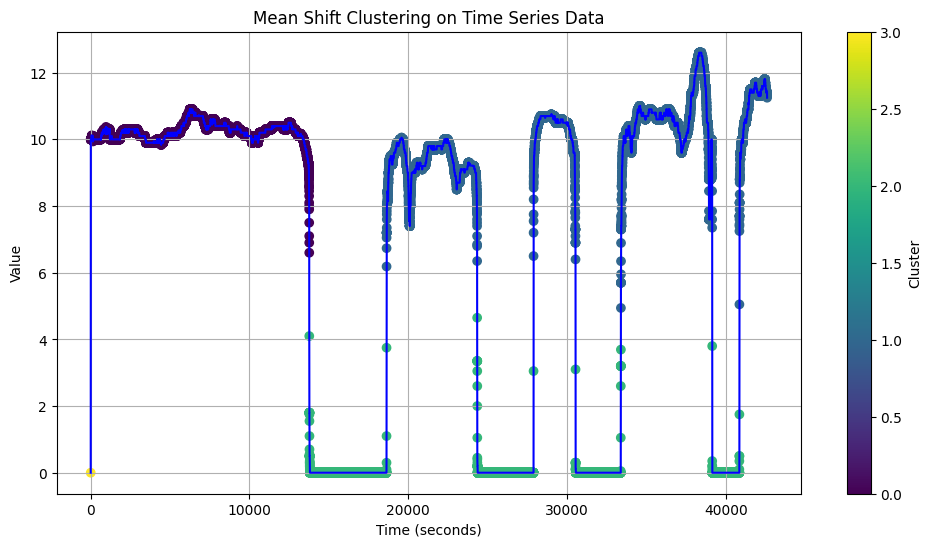

In [ ]:
# Get the cluster labels
df_MSD['cluster'] = mean_shift.labels_

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_MSD['time_in_seconds'], df_MSD['value'], label='Time Series Data', color='blue')
plt.scatter(df_MSD['time_in_seconds'], df_MSD['value'], c=df_MSD['cluster'], cmap='viridis', marker='o')
plt.title('Mean Shift Clustering on Time Series Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Value')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [ ]:
df_MSD[df_MSD['cluster'] == 0]['value'].mean()

10.229289045280593

In [ ]:
%%time
# Apply Mean Shift
mean_shift = MeanShift(bandwidth=2.0, n_jobs=-1)  # Adjust the bandwidth parameter as needed
mean_shift.fit(X_scaled)

CPU times: user 20.2 s, sys: 4.03 s, total: 24.3 s
Wall time: 8min 29s


MeanShift(bandwidth=2.0, n_jobs=-1)

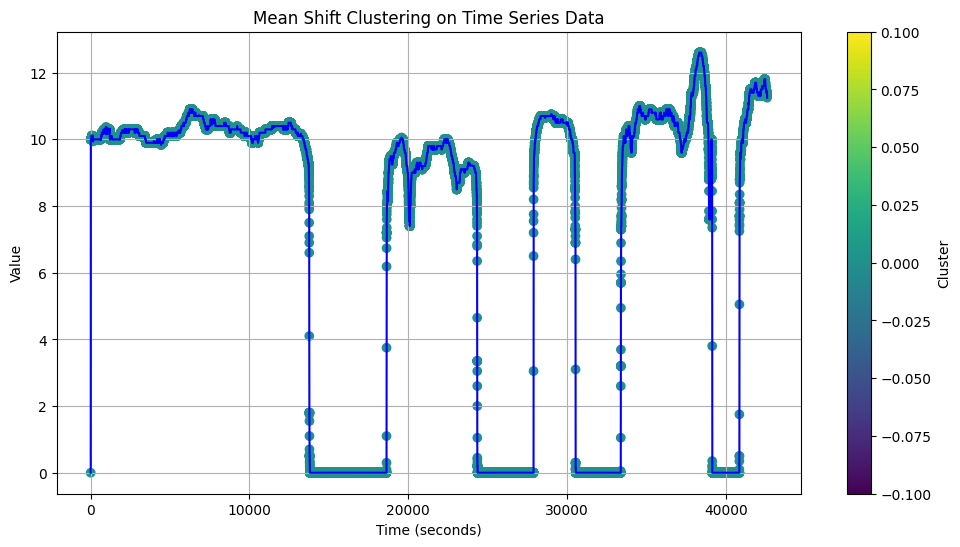

In [ ]:
# Get the cluster labels
df_MSD['cluster'] = mean_shift.labels_

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_MSD['time_in_seconds'], df_MSD['value'], label='Time Series Data', color='blue')
plt.scatter(df_MSD['time_in_seconds'], df_MSD['value'], c=df_MSD['cluster'], cmap='viridis', marker='o')
plt.title('Mean Shift Clustering on Time Series Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Value')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

Для нашей задачи оптимально брать 1-1.5 bandwidth

## Вывод
Алгоритм неплохо справляется, но смущает что на обработку 44400 (12 часовая смена) наблюдений требуется 8.5-9 минут.  
Решения:
- Уменьшить количество наблюдений посредством агрегации по медиане (большая устойчивость к выбросам)
- Попробовать другие методы кластеризации, возможно они дадут сопоставимый результат, но быстрее и меньше по памяти

# Агрегация данных для умешьшения количества наблюдений

In [ ]:
test_data

,index,Дата/Время,Токовый ремни Афл3.1.Максим RMS
0,0,19.03.2024 1:13:21,0.0
1,1,19.03.2024 1:13:22,0.0
2,2,19.03.2024 1:13:23,0.0
3,3,19.03.2024 1:13:24,0.0
4,4,19.03.2024 1:13:25,0.0
...,...,...,...
42595,42595,19.03.2024 13:13:20,0.0
42596,42596,19.03.2024 13:13:21,0.0
42597,42597,19.03.2024 13:13:22,0.0
42598,42598,19.03.2024 13:13:23,0.0


In [ ]:
# Сглаживание ряда, можно поэкспериментировать с параметром окна, и даже не сглаживать ряд вовсе
test_ts = test_data['Токовый ремни Афл3.1.Максим RMS'].rolling(window=20*60, min_periods=1).median()

<Axes: >

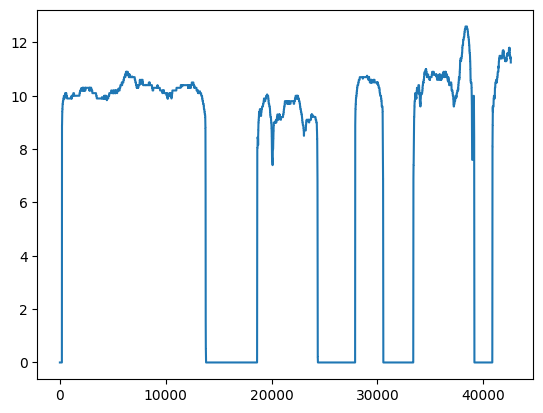

In [ ]:
test_ts.plot()

In [ ]:
test_ts.index = pd.to_timedelta(test_ts.index, unit='s')

In [ ]:
test_ts

,Токовый ремни Афл3.1.Максим RMS
0 days 00:00:00,0.00
0 days 00:00:01,0.00
0 days 00:00:02,0.00
0 days 00:00:03,0.00
0 days 00:00:04,0.00
...,...
0 days 11:49:55,11.40
0 days 11:49:56,11.35
0 days 11:49:57,11.30
0 days 11:49:58,11.30


In [ ]:
down_sampled_ts = test_ts.resample('60s').median()

In [ ]:
down_sampled_ts

,Токовый ремни Афл3.1.Максим RMS
0 days 00:00:00,0.0
0 days 00:01:00,0.0
0 days 00:02:00,0.0
0 days 00:03:00,9.0
0 days 00:04:00,9.7
...,...
0 days 11:45:00,11.6
0 days 11:46:00,11.6
0 days 11:47:00,11.8
0 days 11:48:00,11.5


<Axes: >

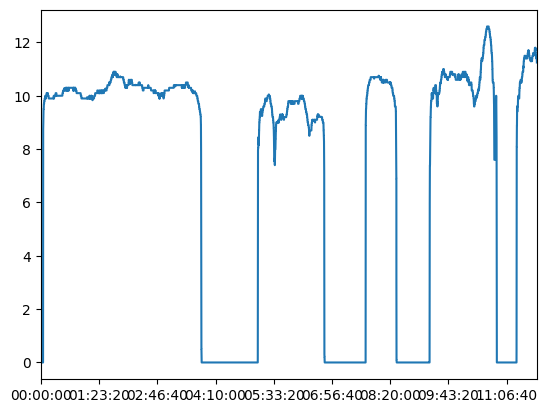

In [ ]:
test_ts.plot()

<Axes: >

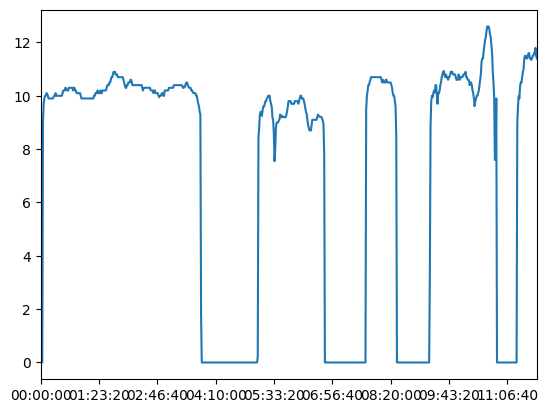

In [ ]:
down_sampled_ts.plot()

Визуально картинка не изменилась после масштабирования, но количество наблюдений сократилось в 60 раз, что существенно ускорит процесс, осталось сравнить результаты работы алгоритмов кластеризации и нахождения тренда на этих данных.

## Кластеризация

In [ ]:
# Create a DataFrame
df_MSD = pd.DataFrame({'time': down_sampled_ts.reset_index().index, 'value': down_sampled_ts})

# Prepare the data for clustering
X = df_MSD[['time', 'value']].values


In [ ]:
type(X)

numpy.ndarray

In [ ]:
%%time
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

CPU times: user 3.39 ms, sys: 0 ns, total: 3.39 ms
Wall time: 3.2 ms


In [ ]:
%%time
# Apply Mean Shift
mean_shift = MeanShift(bandwidth=1.0)  # Adjust the bandwidth parameter as needed
mean_shift.fit(X_scaled)

CPU times: user 4.35 s, sys: 42.9 ms, total: 4.39 s
Wall time: 4.48 s


MeanShift(bandwidth=1.0)

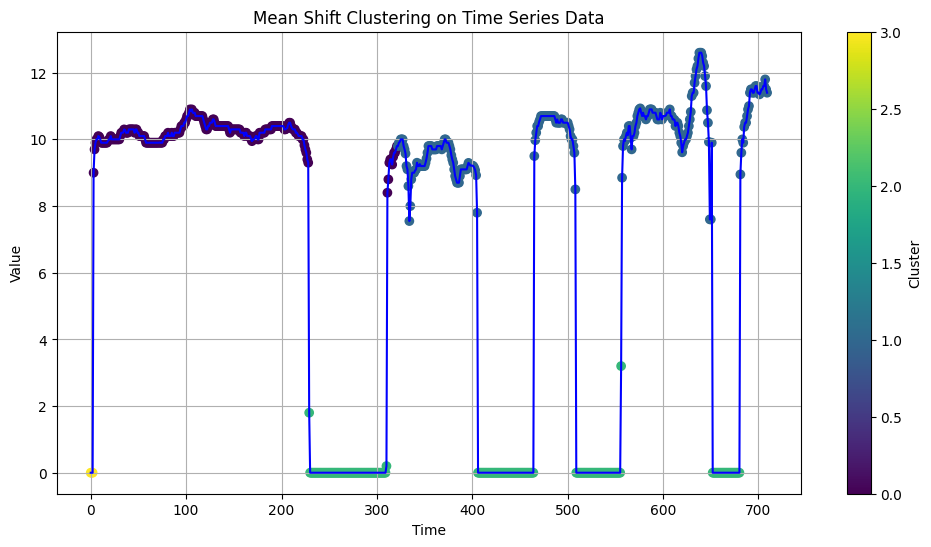

In [ ]:
# Get the cluster labels
df_MSD['cluster'] = mean_shift.labels_

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_MSD['time'], df_MSD['value'], label='Time Series Data', color='blue')
plt.scatter(df_MSD['time'], df_MSD['value'], c=df_MSD['cluster'], cmap='viridis', marker='o')
plt.title('Mean Shift Clustering on Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [ ]:
df_MSD.cluster.value_counts()

,count
cluster,
1,252
0,237
2,218
3,3


Кластеризация почти с тем же результатом, но затрачено всего 9 секунд

## Взятие тренда, downsampled ряд


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
clustered_ts_value = []
clustered_ts_time = []
clustered_ts_cofs = []
clustered_ts_intercepts = []

In [ ]:
for cluster in sorted(df_MSD.cluster.unique()):
  clustered_series = df_MSD[df_MSD.cluster == cluster]
  model = LinearRegression()
  model.fit(clustered_series[['time']], clustered_series['value'])
  clustered_ts_value.append(model.predict(clustered_series[['time']]))
  clustered_ts_time.append(clustered_series[['time']])

  # a
  clustered_ts_cofs.append(model.coef_[0])

  # b
  clustered_ts_intercepts.append(model.intercept_)

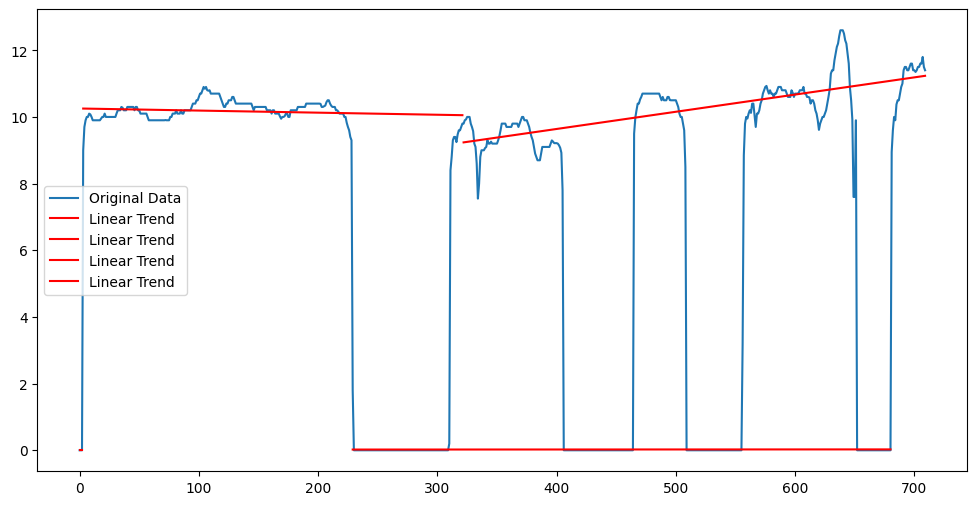

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_MSD['time'], df_MSD['value'], label='Original Data')
for cluster in sorted(df_MSD.cluster.unique()):
  plt.plot(clustered_ts_time[cluster], clustered_ts_value[cluster], label='Linear Trend', color='red')
plt.legend()
plt.show()

In [ ]:
clustered_ts_cofs

[-0.0006248221535583524, 0.005159421472996489, 1.0154817191784927e-05, 0.0]

In [ ]:
clustered_ts_intercepts

[10.253410685771968, 7.575526178980497, 0.01953797271828161, 0.0]

# Исходный ряд

In [ ]:
test_ts

,Токовый ремни Афл3.1.Максим RMS
0 days 00:00:00,0.00
0 days 00:00:01,0.00
0 days 00:00:02,0.00
0 days 00:00:03,0.00
0 days 00:00:04,0.00
...,...
0 days 11:49:55,11.40
0 days 11:49:56,11.35
0 days 11:49:57,11.30
0 days 11:49:58,11.30


In [ ]:
# Create a DataFrame
df_MSD = pd.DataFrame({'time': test_ts.reset_index().index, 'value': test_ts})

# Prepare the data for clustering
X = df_MSD[['time', 'value']].values


In [ ]:
%%time
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

CPU times: user 4.47 ms, sys: 0 ns, total: 4.47 ms
Wall time: 6.68 ms


In [ ]:
%%time
# Apply Mean Shift
mean_shift = MeanShift(bandwidth=1.0)  # Adjust the bandwidth parameter as needed
mean_shift.fit(X_scaled)

CPU times: user 9min 53s, sys: 1.69 s, total: 9min 54s
Wall time: 10min


MeanShift(bandwidth=1.0)

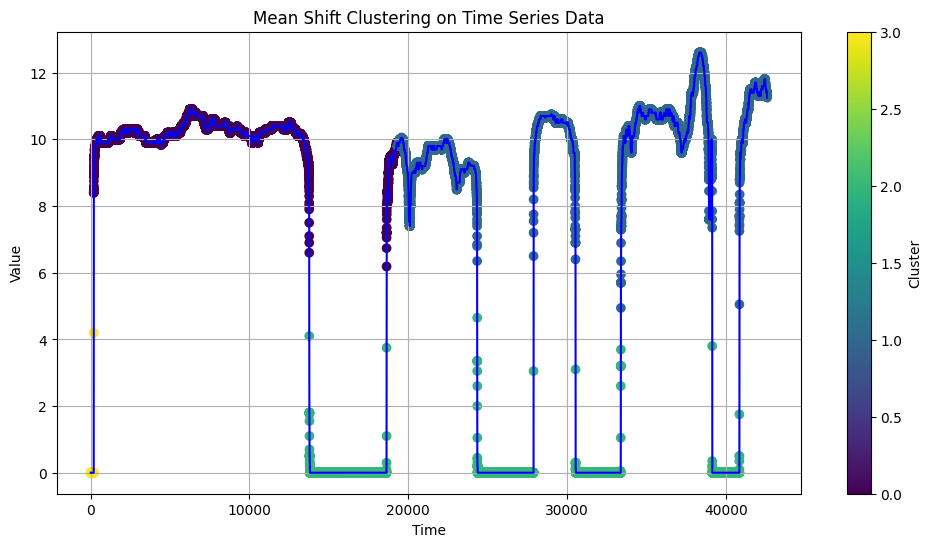

In [ ]:
# Get the cluster labels
df_MSD['cluster'] = mean_shift.labels_

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_MSD['time'], df_MSD['value'], label='Time Series Data', color='blue')
plt.scatter(df_MSD['time'], df_MSD['value'], c=df_MSD['cluster'], cmap='viridis', marker='o')
plt.title('Mean Shift Clustering on Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [ ]:
df_MSD.cluster.value_counts()

,count
cluster,
1,15156
0,14262
2,12992
3,190


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
sorted(df_MSD.cluster.unique())

[0, 1, 2, 3]

In [ ]:
clustered_ts_value = []
clustered_ts_time = []
clustered_ts_cofs = []
clustered_ts_intercepts = []

In [ ]:
for cluster in sorted(df_MSD.cluster.unique()):
  clustered_series = df_MSD[df_MSD.cluster == cluster]
  model = LinearRegression()
  model.fit(clustered_series[['time']], clustered_series['value'])
  clustered_ts_value.append(model.predict(clustered_series[['time']]))
  clustered_ts_time.append(clustered_series[['time']])

  # a
  clustered_ts_cofs.append(model.coef_[0])

  # b
  clustered_ts_intercepts.append(model.intercept_)

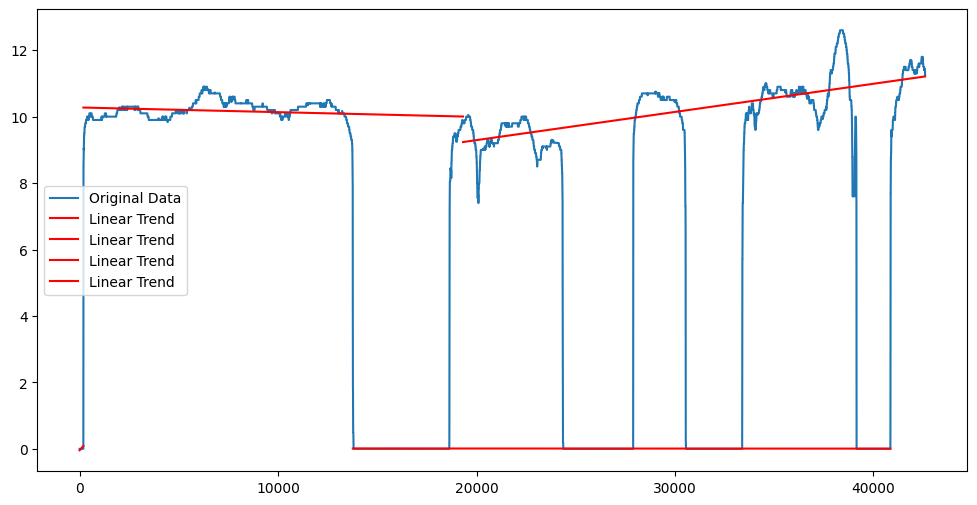

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_MSD['time'], df_MSD['value'], label='Original Data')
for cluster in sorted(df_MSD.cluster.unique()):
  plt.plot(clustered_ts_time[cluster], clustered_ts_value[cluster], label='Linear Trend', color='red')
plt.legend()
plt.show()

In [ ]:
clustered_ts_cofs

[-1.4102945341794015e-05,
 8.479938028697182e-05,
 -1.5883243917987852e-07,
 0.0006944061724993111]

In [ ]:
clustered_ts_intercepts

[10.276237665144064,
 7.597775661658504,
 0.012796413171703502,
 -0.04351612014329016]

## Сравнение коэфициентов *a* исходного ряда и downsampled

In [ ]:
downsampled_coefs = np.array( [-0.0006248221535583524, 0.005159421472996489, 1.0154817191784927e-05, 0.0])

In [ ]:
original_coefs = np.array( [-1.4102945341794015e-05, 8.479938028697182e-05, -1.5883243917987852e-07, 0.0006944061724993111])

В данном случае важны только 2 первых значения коэффициентов в обоих массивах.
Первое отличается на порядок, второе на 2 порядка.

downsampling показывает хороший результат, при том сильно ускоряет время обработки сигнала и уменьшает требуемую память.

In [ ]:
np.abs(original_coefs - downsampled_coefs)

array([6.10719208e-04, 5.07462209e-03, 1.03136496e-05, 6.94406172e-04])

# Вывод
Далее можно настраивать кртическое пороговое значение. Если коэфициент *a* любой Лог регрессии выходит за предельное значение, отмечаем, что в сигнале есть аномалия - вероятнее всего оборудования деградировало.

In [ ]:
# пример
alpha = 0.05
(downsampled_coefs > alpha).any()

False

# Тестирование на искусственном примере.
Так как примеров сигналов с неисправности пока что нет, но есть описание, что из себя представляют аномальные сигналы, можно сгенерировать искусственные и протестировать работу модели.


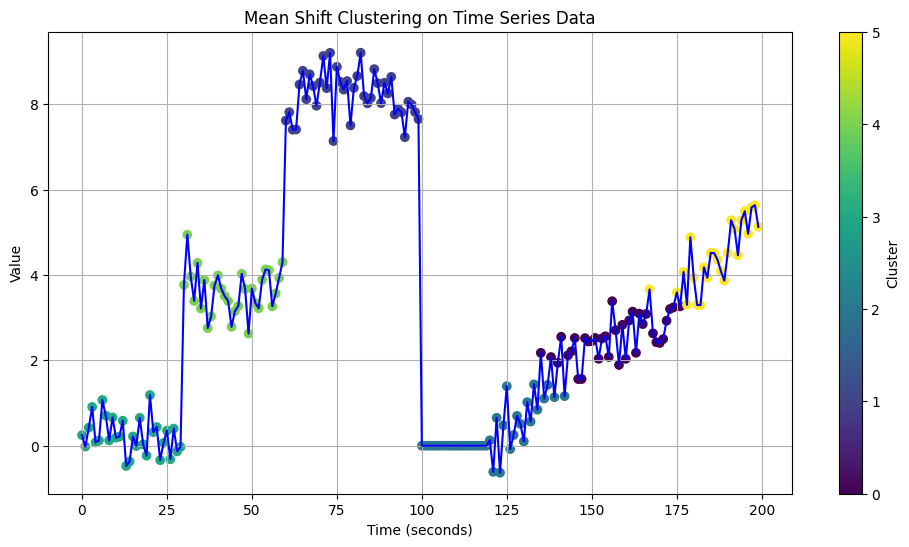

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic time series data
np.random.seed(42)
time = np.arange(0, 200)
data = 0.5*np.sin(time / 10) + np.random.normal(scale=0.5, size=time.shape)

# Introduce shifts
data[30:60] += 4.0  # Shift the mean of the signal
data[60:100] += 8.0  # Shift the mean of the signal again
data[100:120] = 0  # Shift the mean of the signal again
data[120:] += (np.array(list(range(0, 80))) / 15)   # Shift the mean of the signal again

# Create a DataFrame
df = pd.DataFrame({'time_in_seconds': time, 'value': data})

# Prepare the data for clustering
X = df[['time_in_seconds', 'value']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Mean Shift
mean_shift = MeanShift(bandwidth=0.5)  # Adjust the bandwidth parameter as needed
mean_shift.fit(X_scaled)

# Get the cluster labels
df['cluster'] = mean_shift.labels_

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df['time_in_seconds'], df['value'], label='Time Series Data', color='blue')
plt.scatter(df['time_in_seconds'], df['value'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('Mean Shift Clustering on Time Series Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Value')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


Данные, которые помечены кластерами под номером 0 и 4 являются аномальными.

In [ ]:
clustered_ts_value = []
clustered_ts_time = []
clustered_ts_cofs = []
clustered_ts_intercepts = []

In [ ]:
for cluster in sorted(df.cluster.unique()):
  clustered_series = df[df.cluster == cluster]
  model = LinearRegression()
  model.fit(clustered_series[['time_in_seconds']], clustered_series['value'])
  clustered_ts_value.append(model.predict(clustered_series[['time_in_seconds']]))
  clustered_ts_time.append(clustered_series[['time_in_seconds']])

  # a
  clustered_ts_cofs.append(model.coef_[0])

  # b
  clustered_ts_intercepts.append(model.intercept_)

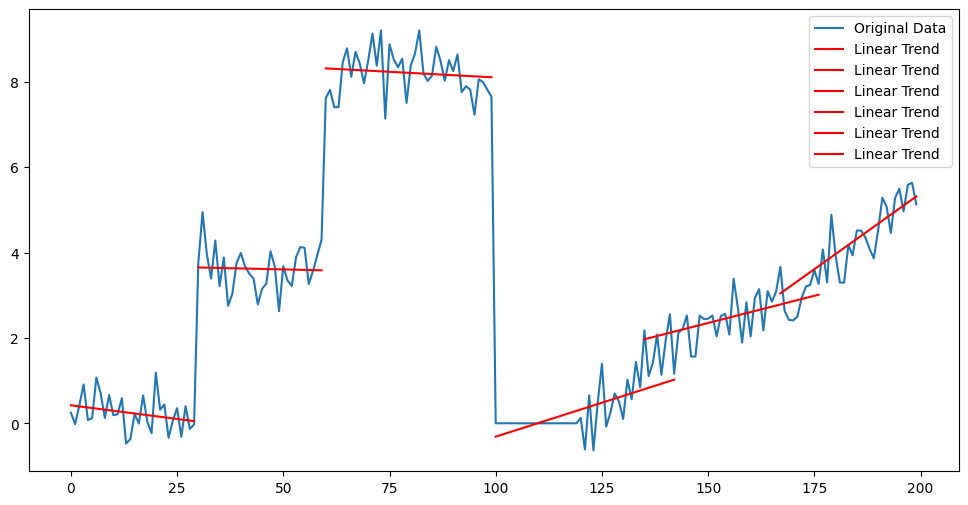

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['time_in_seconds'], df['value'], label='Original Data')
for cluster in sorted(df.cluster.unique()):
  plt.plot(clustered_ts_time[cluster], clustered_ts_value[cluster], label='Linear Trend', color='red')
plt.legend()
plt.show()

In [ ]:
clustered_ts_cofs

[0.06250553897442032,
 -0.005334905358480319,
 -0.002278076807622134,
 -0.01279299951938106,
 0.022693008709025596]

In [ ]:
(np.array(clustered_ts_cofs) > 0.05).any()

True

Аномалия обноружена.
Таким образом, эту модель можно использовать для детекции аномалий в сигнале.

# Реализация метода и проверка на исскуственном примере

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.optimize import minimize


class TSTrendDetection:
    def __init__(self, bandwidth = 1.0):
        self.bandwidth = bandwidth
        self.mean_shift = MeanShift(bandwidth = self.bandwidth)
        self.scaler = StandardScaler()

    def fit_mean_shift(self, X):
        """
        Mean Shift model fitting.

        Parameters
        ----------
        X: np.ndarray (shape = (samples_count, 2)) :
            first samples time
            second samples values
        or
        X: pd.DataFrame:
            has column time
            has column value

        Returns
        -------
        X: np.ndarray (shape = (samples_count, 2)) :
            first samples time
            second samples values
        labels: np.ndarray:
            np.ndarray (shape = (samples_count,))
        clustered_ts_value: list:
            list of np.ndarray of clustered values
        clustered_ts_time: list:
            list of np.ndarray of clustered times
        clustered_ts_cofs: list:
            list of slopes of linear regression
        clustered_ts_intercepts: list:
            list of intercepts of linear regression
        """

        if isinstance(X, pd.DataFrame):
            X = X[['time', 'value']].copy().values
        if not isinstance(X, np.ndarray):
            raise ValueError("X must be np.ndarray or pd.DataFrame.")

        # Scaling ts data
        scaler = self.scaler
        X_scaled = scaler.fit_transform(X)

        # Clustering ts data
        self.mean_shift.fit(X_scaled)
        labels = self.mean_shift.labels_

        # Linear regressions for clustered data
        clusters = np.unique(labels)

        clustered_ts_values = []
        clustered_ts_times = []
        clustered_ts_cofs = []
        clustered_ts_intercepts = []

        for cluster in clusters:
            clustered_series = X[np.where(labels == cluster)]

            times, values, cof, intercept = self._fit_linear_regression(
                clustered_series)

            clustered_ts_values.append(values)
            clustered_ts_times.append(times)
            clustered_ts_cofs.append(cof[0])
            clustered_ts_intercepts.append(intercept)

        return (X, labels, clustered_ts_times, clustered_ts_values,
                clustered_ts_cofs, clustered_ts_intercepts)

    def _fit_linear_regression(self, clustered_series):
        """fit_linear_regression
        Parameters
        ----------
        clustered_series: np.ndarray (shape = (samples of cluster, 2)) :
            first samples time
            second samples values

        Returns
        -------
        X: np.ndarray (shape = (samples_count, 2)) :
            first samples time
            second samples values
        clustered_ts_value: np.ndarray:
            np.ndarray of clustered values
        clustered_ts_time: np.ndarray:
            np.ndarray of clustered times
        clustered_ts_cofs: float:
            slope of a linear regression
        clustered_ts_intercepts: float:
            intercept of a linear regression
        """
        model = LinearRegression()
        model.fit(clustered_series[:, 0].reshape(-1, 1),
                  clustered_series[:, 1].reshape(-1, 1)
                  )

        clustered_ts_value = model.predict(
            clustered_series[:, 0].reshape(-1, 1)
            )
        clustered_ts_time = clustered_series[:, 0]

        # a - slope of a linear regression
        clustered_ts_cofs = model.coef_[0]

        # b - intercept of a linear regression
        clustered_ts_intercepts = model.intercept_

        return (clustered_ts_time, clustered_ts_value,
                clustered_ts_cofs, clustered_ts_intercepts)

    def predict(self, X, alpha):
        """
        Prediction using slopes of linear regressions.
        if true then anomaly detected in time series
        """

        _, _, _, _, clustered_ts_cofs, _ = self.fit_mean_shift(X)

        return (clustered_ts_cofs > alpha).any()

    def downsample(self, time_series, smoothing_window, skip_window):
        """
        Method for time series downsampling.
        """
        if not isinstance(time_series, pd.Series):
            raise ValueError("Time series mus be a pd.Series.")

        time_series = time_series.copy().rolling(window=smoothing_window,
                                                 min_periods=1).median()

        time_series.index = pd.to_timedelta(test_ts.index, unit='s')
        time_series = time_series.resample(skip_window).median()


        return pd.DataFrame({'time': test_ts.index,
                             'value': time_series.values})

    def _binary_cross_entropy(self, threshold, slopes, labels):
        """
        binary cross entropy
        ----------
        threshold: float:
            finding best threshold, by optimizing bce
        slopes: list, array:
            list of slopes, used as thresholds
        labels: np.ndarray (shape = (samples of cluster, 2)) :
            labeled anomalies: 1 if anomaly, 0 otherwise
        Returns
        -------
        best_threshold: float:
            threshold corresponding to highest f1 score
        """
        predictions = (slopes >= threshold).astype(int)
        epsilon = 1e-15
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        bce = -np.mean(labels * np.log(predictions) + (1 - labels) * np.log(1 - predictions))
        return bce

    def evaluate_thresholds(self, slopes, labels):
        """
        A method for finding best threshold using binary cross entropy
        ----------
        slopes: list, array:
            list of slopes of linear regressions,
        labels: np.ndarray (shape = (samples of cluster, 2)) :
            labeled anomalies: 1 if anomaly, 0 otherwise
        Returns
        -------
        best_threshold: float:
            threshold corresponding to best cross entropy result
        """
        if len(slopes) < 2:
          raise ValueError("Thresholds list must consist of at least two elements.")

        initial_threshold = np.mean(slopes)

        # binary cross entropy minimization
        result = minimize(self._binary_cross_entropy, initial_threshold, args=(slopes, labels), bounds=[(min(slopes), max(slopes))])

        if result.success:
            optimal_threshold = result.x[0]
            return optimal_threshold
        raise Exception("Optimization failed")


    def plot_clustering_results(self, X, labels):
        """A method for graphical display of clustering results."""
        plt.plot(X[:, 0], X[:, 1], label='Time Series Data', color='blue')
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
        plt.title('Clustering results using Mean Shift')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.colorbar(label='Метки кластеров')
        plt.grid()
        plt.show()

    def plot_LR_results(self, X, labels, clustered_times, clustered_values):
        """
        A method for graphical display of
        the results of constructing a linear regression.
        """
        plt.plot(X[:, 0], X[:, 1], label='Time Series Data', color='blue')
        for cluster in np.unique(labels):
          plt.plot(clustered_times[cluster], clustered_values[cluster],
                   label='Linear Trend', color='red')
        plt.legend()
        plt.grid()
        plt.show()


In [30]:
# Step 1: Generate synthetic time series data
np.random.seed(42)
time = np.arange(0, 200)
data = 0.5*np.sin(time / 10) + np.random.normal(scale=0.5, size=time.shape)

# Introduce shifts
data[30:60] += 4.0  # Shift the mean of the signal
data[60:100] += 8.0  # Shift the mean of the signal again
data[100:120] = 0  # Shift the mean of the signal again
data[120:] += (np.array(list(range(0, 80))) / 15)   # Shift the mean of the signal again

# Create a DataFrame
df = pd.DataFrame({'time': time, 'value': data})

In [31]:
model = TSTrendDetection(bandwidth = 0.8)

In [32]:
%%time
data, cluster_labels, clustered_times, clustered_values, clustered_cofs, clustered_intercepts = model.fit_mean_shift(df)

CPU times: user 719 ms, sys: 2.09 ms, total: 722 ms
Wall time: 777 ms


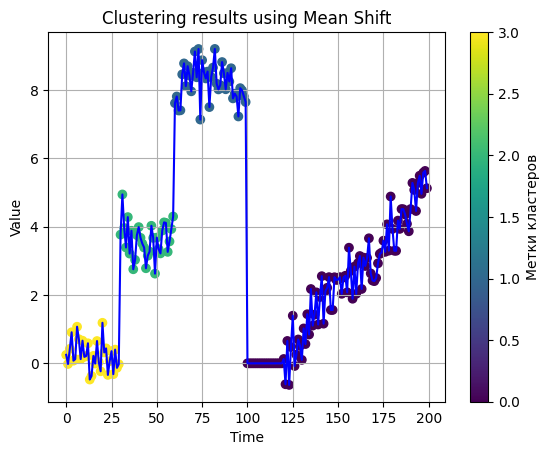

In [33]:
model.plot_clustering_results(data, cluster_labels)

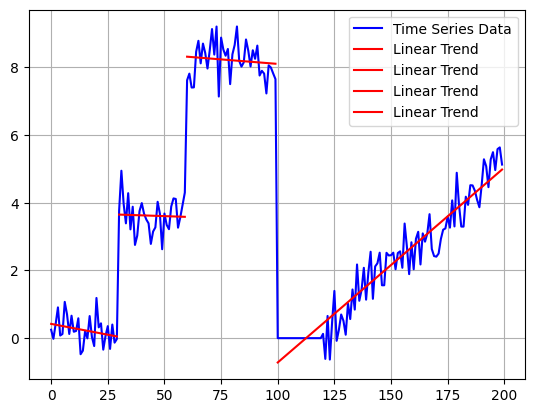

In [34]:
model.plot_LR_results(data, cluster_labels, clustered_times, clustered_values)

In [35]:
clustered_cofs

[0.05758211900884241,
 -0.005334905358480319,
 -0.002278076807622134,
 -0.01279299951938106]

Разметка данных:  
- Во время обучения модели, подбора гиперпараметров (bandwidth, smoothing_window, skip_window), данные представляются эксперту предметной области и он отмечает сегменты (кластеры), которые помечаются 1 - если есть аномалия и 0 - если нет.
- Есть общие правила, взятые из предметной области, по которым можно разметить данные

In [36]:
# Пусть данные пометили
labels = np.array([1, 0, 0, 0])

In [37]:
clustered_cofs

[0.05758211900884241,
 -0.005334905358480319,
 -0.002278076807622134,
 -0.01279299951938106]

In [38]:
# Функция для подбора порогового значения, выдает все пороги
def evaluate_thresholds(thresholds, labels):
        f1_scores = {}
        for threshold in thresholds:
            # Преобразование предсказаний в бинарные метки
            binary_predictions = (thresholds > threshold).astype(int)
            f1 = f1_score(labels, binary_predictions)
            f1_scores[threshold] = f1
        return f1_scores

In [39]:
# Сделаю чтобы выдавало все варианты порога
result = evaluate_thresholds(clustered_cofs, labels)

In [40]:
result

{0.05758211900884241: 0.0,
 -0.005334905358480319: 0.6666666666666666,
 -0.002278076807622134: 1.0,
 -0.01279299951938106: 0.5}

In [41]:
best_alpha = model.evaluate_thresholds(clustered_cofs, labels)

In [42]:
best_alpha

0.009294034330839723

Получается, что для порогового значения -0.00227... f1 на тренировочных данных самый большой.  
Так как предметная область предполагает, что аномалия проявляется только в растущем тренде, то можно взять, конкретно для этого примера порог = 0.

В целом, можно собрать большую коллекцию значений наклона линейной регрессии и подобрать такой порог, для которого f1 будет наивысшим

Проверка предсказания

In [ ]:
# Step 1: Generate synthetic time series data
np.random.seed(42)
time_test = np.arange(0, 200)
data_test = 0.5*np.sin(time_test / 10) + np.random.normal(scale=0.5, size=time.shape)

# Introduce shifts
data_test[30:60] += 2.0  # Shift the mean of the signal
data_test[100:120] = 0  # Shift the mean of the signal again
data_test[120:] += (np.array(list(range(0, 80))) / 12)   # Shift the mean of the signal again

# Create a DataFrame
df_test = pd.DataFrame({'time': time_test, 'value': data_test})

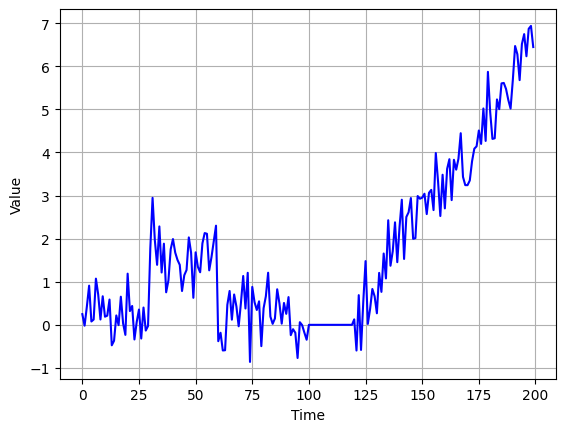

In [ ]:
plt.plot(df_test['time'], df_test['value'], label='Time Series Data', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()

Есть явная аномалия

In [ ]:
# True
model.predict(df_test, best_alpha)

True

Аномалия найдена

**Предлагаю такое решение как baseline решение задачи**